# Task 3

## Data source

  * The source of the data is the file `CC GENERAL.csv` (original file here: [CC GENERAL.csv](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)).
  * The description of the dataset can be found in the file `data_description.txt`.

## Instructions for Processing

  * Perform basic data exploration and discuss your observations. Based on this, properly address problematic aspects in the data (missing values, etc.) and explain the motivation behind the steps taken.
  * Create your **own implementation** of the KMeans algorithm.
  * Perform clustering using your own implementation.
  * Repeat clustering with the `sklearn.cluster.KMeans` implementation. Attempt to tune hyperparameters to achieve the same results. If unsuccessful, discuss why.
  * Attempt to estimate an appropriate number of clusters.
  * Also, perform agglomerative hierarchical clustering (use an existing implementation) and plot the dendrogram (or at least its suitable upper part).
  * Repeat the previous steps, experimenting with different hyperparameter values and data standardization/normalization.
    * You can analyze the quality of the created clusters using the Silhouette method (https://en.wikipedia.org/wiki/Silhouette_(clustering)).
  * The goal is to choose the clustering that seems best to you (you can consider the following point). Describe why you chose it.
  * With this chosen clustering, try to interpret the resulting clusters.
    * Try to identify and describe types of credit card users based on your chosen criteria, such as BALANCE, PURCHASES, CASH_ADVANCE, PAYMENTS, etc.

## Let's start

In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

np.set_printoptions(precision=5, suppress=True)

In [2]:
data = pd.read_csv("CC GENERAL.csv")

### Analyzing and preparing the data

In [3]:
display(data.shape)
display(data.info())
display(data.nunique())
display(data.head(10))
print('\n')

(8950, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

None

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Do a `statistical analysis` of the data. Check if in **FREQUENCE** columns values are less than 1 and greater than 0. 

In [4]:
display(data.describe())
print('\n')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Drop column **CUST_ID**. Identification of Credit Card holder is a `categorical` feature and there is no sense to make a conversion to a `numeric` feature, because this attribute does not provide any valuable information that could help in the construction of the model. As we can see from the dates above, the order of **CUST_ID** has `no pattern` with сustomers.

In [5]:
data.drop("CUST_ID", inplace=True, axis=1)

Now let's create a `corellation matrix` of our data.

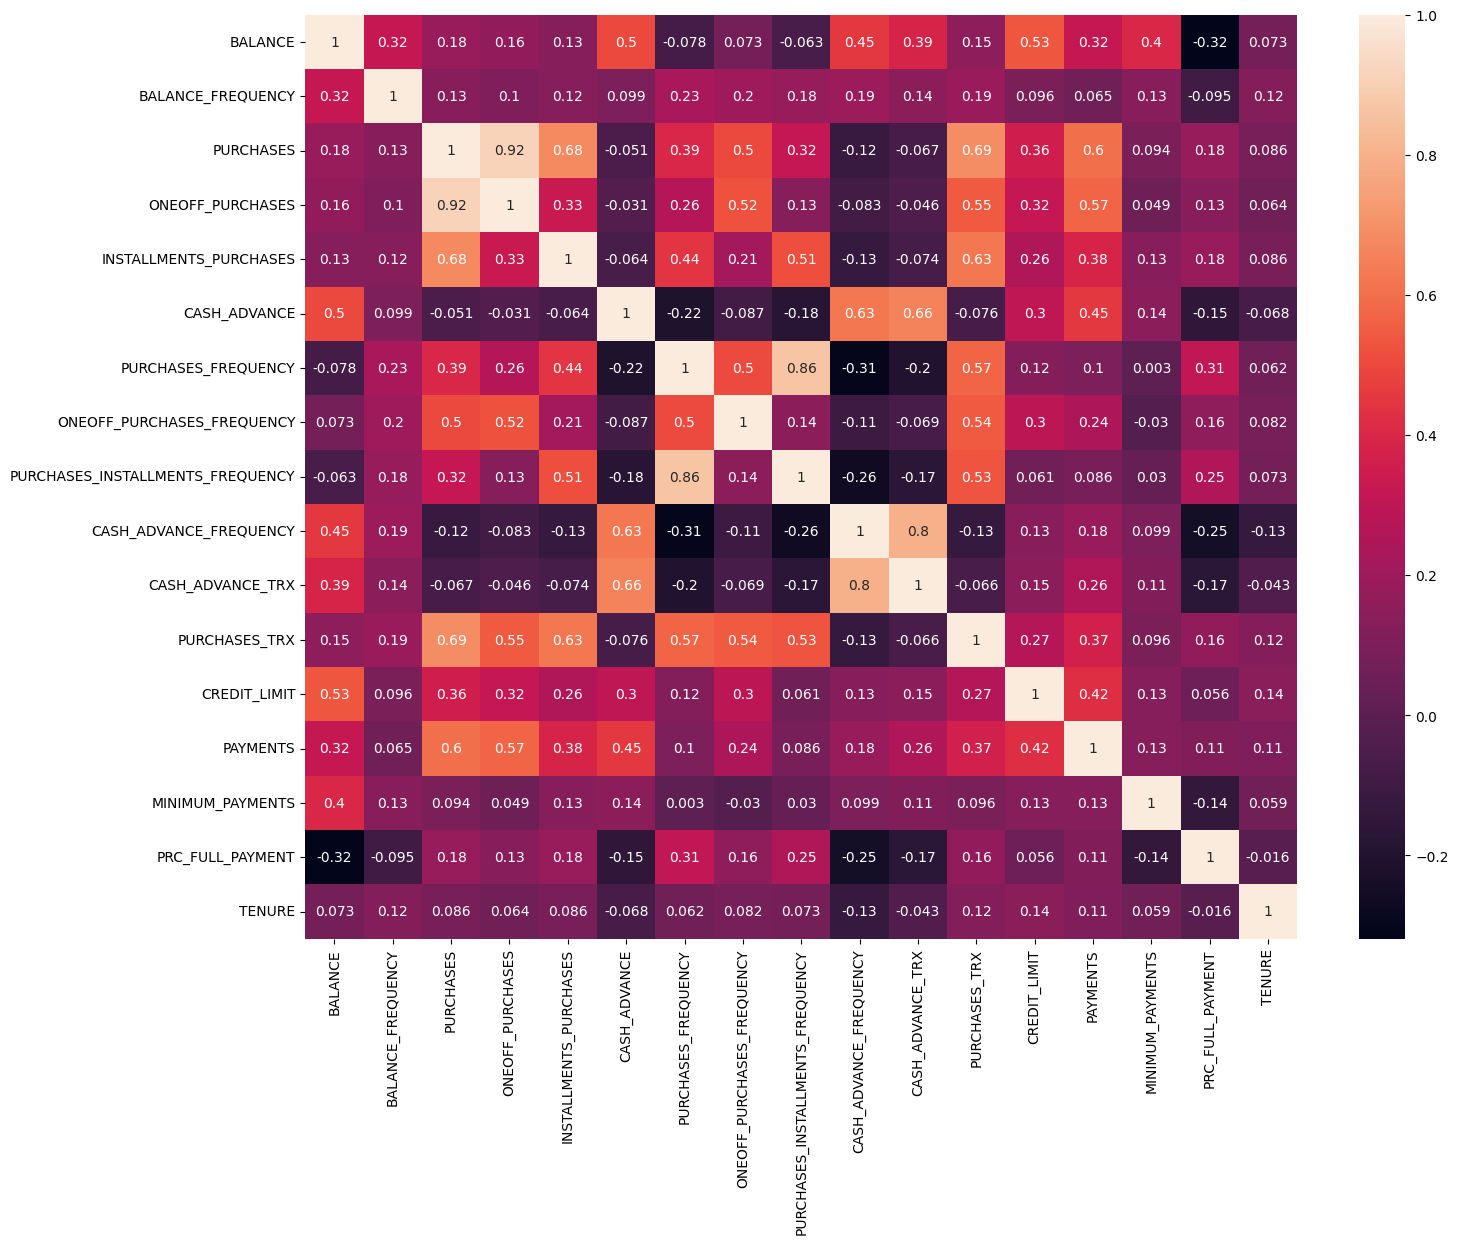

In [6]:
datacorr = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(datacorr, annot=True)
plt.show()

We may notice that there are two highly-corelated pairs of features: **PURCHASES** and **ONEOFF_PURCHASES**, **PURCHASES_FREQUENCY** and **PURCHASES_INSTALLMENTS_FREQUENCY**. Keep this information in mind, possibly in future we will `get rid` of a couple of features.

Remove possible `duplicates` from the table.

In [7]:
data.drop_duplicates(inplace=True)
data.shape 

(8950, 17)

We have null values only in two columns and they are few in number, so let's replace them with `average value` of these features.

In [8]:
data = data.fillna(data["CREDIT_LIMIT"].mean())
data = data.fillna(data["MINIMUM_PAYMENTS"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### Own implementation of the KMeans algorithm.

Let's implement the k-means algorithm using a class.

`Num_clusters` ( amount of clusters ), `init` ( method for initialization ), `num_init` ( number of times the k-means algorithm is run with different centroid seeds ), `max_iter` ( maximum number of iterations of the k-means algorithm for a single run ) and `rd_seed` ( determines random number generation for centroid initialization ) are parameters, that can be selected by the user ( they are similar to the parameters of the library function ). 

`Centroids`, `clusters`, `clusters_to_return`, `iteration` and `obj_function_value` are the outputs of our function ( attributes ).

Method `fit` takes a dataset (data) as input and runs the K-Means algorithm to find clusters in the data. 

Method `kmeans_plus_plus` initializes the centroids of the clusters using the K-Means++ algorithm, which is a method for selecting the initial centroids that aims to improve the convergence of the K-Means algorithm.

In [9]:
class my_KMeans:
    def __init__(self, num_clusters, init='k-means++', num_init=10, max_iter=300, rd_seed=None):
        valid_inits = ["k-means++", "random"]
        if init not in valid_inits:
            raise ValueError(f"Invalid initialization method. Expected one of {valid_inits}, got {init}")
        if num_clusters < 1 or num_init < 1 or max_iter < 1 or not isinstance(num_clusters, int) or not isinstance(num_init, int) or not isinstance(max_iter, int):
            raise ValueError("Invalid integer argument, parameter must be bigger than 1 and must be an integer.")
            
        self.num_clusters = num_clusters
        self.init = init
        self.num_init = num_init
        self.max_iter = max_iter
        self.rd_seed = rd_seed
        self.centroids = None
        self.clusters = {}
        self.clusters_to_return = []
        self.iteration = 0
        self.obj_function_value = math.inf

#--------------------------------
    def fit(self, data):
        numpy_data = data.values
        for num in range(self.num_init):
            if self.init == 'k-means++':
                centroids = data.sample(random_state=self.rd_seed).values
                centroids = self.kmeans_plus_plus(numpy_data, centroids)
            else:
                centroids = data.sample(num_clusters, random_state=self.rd_seed).values

            iteration = 0
            while iteration < self.max_iter + 1:
                clusters = {i: [] for i in range(self.num_clusters)}
                clusters_to_return = []
                
                # compute distances between all data points and centroids
                distances = np.linalg.norm(numpy_data[:, None, :] - centroids, 2, axis=2)
                
                # find the indexes of the closest centroids for each data point
                cluster_indexes = np.argmin(distances, axis=1)

                # assign the data point to the corresponding cluster
                for i, cluster_index in enumerate(cluster_indexes):
                    clusters[cluster_index].append(numpy_data[i])
                    clusters_to_return.append(cluster_index)

                # recalculate the centroids of the clusters
                new_centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters.values()])

                # check if the centroids have changed ( end-of-cycle condition )
                if np.allclose(new_centroids, centroids, rtol=1e-04, atol=1e-05):
                    break
                else:
                    centroids = new_centroids
                iteration += 1

            obj_function_value = 0
            for index, cluster in clusters.items():
                for point in cluster:
                    obj_function_value += np.linalg.norm(point - centroids[index], 2)**2

            # keep attributes, that give the lowest value of object function
            if obj_function_value < self.obj_function_value:
                self.obj_function_value = obj_function_value
                self.iteration = iteration
                self.clusters = clusters
                self.centroids = centroids
                self.clusters_to_return = clusters_to_return
                
#--------------------------------
    def kmeans_plus_plus(self, data, centroids):
        seed(self.rd_seed)
        while centroids.shape[0] < self.num_clusters:
            # calculate distances between all data points and current centroids
            distances = np.linalg.norm(data[:, None, :] - centroids, 2, axis=2)
            
            # find the minimum distance for each data point
            min_distances = np.min(distances, axis=1)
            min_distances = np.power(min_distances, 2)
            sum_min_distances = np.sum(min_distances)

            # choose one new data point at random as a new center, using a weighted probability distribution 
            # where a point x is chosen with probability proportional to distances
            rnd = random() * sum_min_distances

            sum_min_distances = 0
            for i, min_distance in enumerate(min_distances):
                sum_min_distances += min_distance
                if sum_min_distances >= rnd:
                    break

            centroids = np.append(centroids, [data[i]], axis=0)
        return centroids

#--------------------------------
    @property
    def centroids_(self):
        return self.centroids
    
#--------------------------------
    @property
    def clusters_(self):
        return self.clusters_to_return
    
#--------------------------------
    @property
    def n_iter_(self):
        return self.iteration
    
#--------------------------------
    @property
    def inertia_(self):
        return self.obj_function_value


Let's check, if our algorithm works in the same way as the library algorithm.

In [10]:
rd_seed = 143
init = 'random'
num_clusters = 3
num_init = 10

In [11]:
from random import random, seed

my_kmeans = my_KMeans(num_clusters, init=init, num_init=num_init, rd_seed=rd_seed)
my_kmeans.fit(data)

zeros = [label for label in my_kmeans.clusters_ if label == 0]
ones = [label for label in my_kmeans.clusters_ if label == 1]
twos = [label for label in my_kmeans.clusters_ if label == 2]

print("Cluster centers:\n", my_kmeans.centroids_[0], '\n', my_kmeans.centroids_[1], '\n', my_kmeans.centroids_[2])

print("Amount of points in the first cluster:", len(zeros))
print("Amount of points in the second cluster:", len(ones))
print("Amount of points in the third cluster:", len(twos))

print("Num of iterations:", my_kmeans.n_iter_)
print("Minimal objective function value:", my_kmeans.inertia_)

Cluster centers:
 [ 4797.20357     0.90847 10470.72366  7392.99015  3077.89769  5389.98332
     0.73738     0.58288     0.59293     0.22911     9.18657    83.79104
 12470.52239 17990.69494  2489.15088     0.3268     11.84328] 
 [3380.96129    0.94011 1582.50617  988.27015  594.54758 2092.53331
    0.54068    0.31724    0.38541    0.21001    5.71932   22.11967
 9002.46064 2869.89364 1592.63653    0.13511   11.73847] 
 [ 857.59058    0.85447  604.32757  313.07287  291.55367  495.55035
    0.46753    0.15417    0.35235    0.10682    2.25575   10.6772
 2741.11967  998.13881  748.31077    0.15672   11.43265]
Amount of points in the first cluster: 134
Amount of points in the second cluster: 2298
Amount of points in the third cluster: 6518
Num of iterations: 14
Minimal objective function value: 237125360028.75998


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters, init=init, n_init=num_init, random_state=rd_seed).fit(data)
labels = kmeans.labels_

zeros = [label for label in labels if label == 0]
ones = [label for label in labels if label == 1]
twos = [label for label in labels if label == 2]

print("Cluster centers:\n", kmeans.cluster_centers_[0], '\n', kmeans.cluster_centers_[1], '\n', kmeans.cluster_centers_[2])

print("Amount of points in the first cluster:", len(zeros))
print("Amount of points in the second cluster:", len(ones))
print("Amount of points in the third cluster:", len(twos))

print("Num of iterations:", kmeans.n_iter_)
print("Minimal objective function value:", kmeans.inertia_)

Cluster centers:
 [ 4797.20357     0.90847 10470.72366  7392.99015  3077.89769  5389.98332
     0.73738     0.58288     0.59293     0.22911     9.18657    83.79104
 12470.52239 17990.69494  2489.15088     0.3268     11.84328] 
 [3388.2192     0.94017 1582.69072  988.778    594.2251  2094.01717
    0.54023    0.31736    0.38504    0.21008    5.72382   22.13874
 9009.66603 2870.5044  1596.11641    0.13421   11.73866] 
 [ 857.36144    0.85453  605.16235  313.51542  291.94562  496.49775
    0.46775    0.15428    0.35251    0.10689    2.25736   10.68102
 2744.34673  999.64566  747.86474    0.15701   11.43286]
Amount of points in the first cluster: 134
Amount of points in the second cluster: 2295
Amount of points in the third cluster: 6521
Num of iterations: 11
Minimal objective function value: 237125593025.1294


By running two algorithms, we see that they gave `almost identical solutions` ( just look at the *Minimal objective function value*, where the `first six digits` are the `same` ). By observing the performance of the algorithms, I found that my algorithm cannot achieve absolutely identical results because of `different end-of-cycle conditions`. The algorithms `run exactly the same` but the library algorithm always runs `fewer iterations`, i.e. it stops earlier, which may be due to the fact that it has `softer end-of-cycle conditions`.

Now let's check if our `K-Means++` works correct.

In [13]:
init = 'k-means++'
num_init = 1

In [14]:
my_kmeans = my_KMeans(num_clusters, init=init, num_init=num_init, rd_seed=rd_seed)
my_kmeans.fit(data)

zeros = [label for label in my_kmeans.clusters_ if label == 0]
ones = [label for label in my_kmeans.clusters_ if label == 1]
twos = [label for label in my_kmeans.clusters_ if label == 2]

print("Cluster centers:\n", my_kmeans.centroids_[0], '\n', my_kmeans.centroids_[1], '\n', my_kmeans.centroids_[2])

print("Amount of points in the first cluster:", len(zeros))
print("Amount of points in the second cluster:", len(ones))
print("Amount of points in the third cluster:", len(twos))

print("Num of iterations:", my_kmeans.n_iter_)
print("Minimal objective function value:", my_kmeans.inertia_)

Cluster centers:
 [3380.96129    0.94011 1582.50617  988.27015  594.54758 2092.53331
    0.54068    0.31724    0.38541    0.21001    5.71932   22.11967
 9002.46064 2869.89364 1592.63653    0.13511   11.73847] 
 [ 857.59058    0.85447  604.32757  313.07287  291.55367  495.55035
    0.46753    0.15417    0.35235    0.10682    2.25575   10.6772
 2741.11967  998.13881  748.31077    0.15672   11.43265] 
 [ 4797.20357     0.90847 10470.72366  7392.99015  3077.89769  5389.98332
     0.73738     0.58288     0.59293     0.22911     9.18657    83.79104
 12470.52239 17990.69494  2489.15088     0.3268     11.84328]
Amount of points in the first cluster: 2298
Amount of points in the second cluster: 6518
Amount of points in the third cluster: 134
Num of iterations: 21
Minimal objective function value: 237125360028.76035


In [15]:
kmeans = KMeans(n_clusters=num_clusters, init=init, n_init=num_init, random_state=rd_seed).fit(data)
labels = kmeans.labels_

zeros = [label for label in kmeans.labels_ if label == 0]
ones = [label for label in kmeans.labels_ if label == 1]
twos = [label for label in kmeans.labels_ if label == 2]

print("Cluster centers:\n", kmeans.cluster_centers_[0], '\n', kmeans.cluster_centers_[1], '\n', kmeans.cluster_centers_[2])

print("Amount of points in the first cluster:", len(zeros))
print("Amount of points in the second cluster:", len(ones))
print("Amount of points in the third cluster:", len(twos))

print("Num of iterations:", kmeans.n_iter_)
print("Minimal objective function value:", kmeans.inertia_)

Cluster centers:
 [3360.8734     0.94041 1583.91099  988.17166  596.04833 2078.75941
    0.542      0.31863    0.38606    0.20861    5.67846   22.19637
 8982.41456 2859.85383 1584.86297    0.13589   11.74061] 
 [ 857.3751     0.85412  600.967    311.13403  290.13281  495.79214
    0.46684    0.1532     0.35202    0.10702    2.26019   10.6164
 2729.96123  996.24604  748.61376    0.1565    11.43099] 
 [ 4797.20357     0.90847 10470.72366  7392.99015  3077.89769  5389.98332
     0.73738     0.58288     0.59293     0.22911     9.18657    83.79104
 12470.52239 17990.69494  2489.15088     0.3268     11.84328]
Amount of points in the first cluster: 2313
Amount of points in the second cluster: 6503
Amount of points in the third cluster: 134
Num of iterations: 19
Minimal objective function value: 237126155132.66977


Here too, the results are `very similar`, but still `more different` than in the previous case. There are two reasons for this: the first is exactly the same - `different end-of-cycle conditions`, the second is that this algorithm is `randomised` and when observing the algorithm runs I noticed that they literally do not give exactly the same answers from the first iteration ( unlike in the previous case ). Due to the fact that I don't know how `random` is used `within the library algorithm`, they don't turn out to be exactly the same, although the results are very similar.

### Elbow method for estimation the suitable number of clusters

We display the value of the dependence `objective function` on `number of clusters` and look for the breakpoint ( elbow ) - the point after which the function stops falling so `precipitously`.

Elbow method on library K-Means:

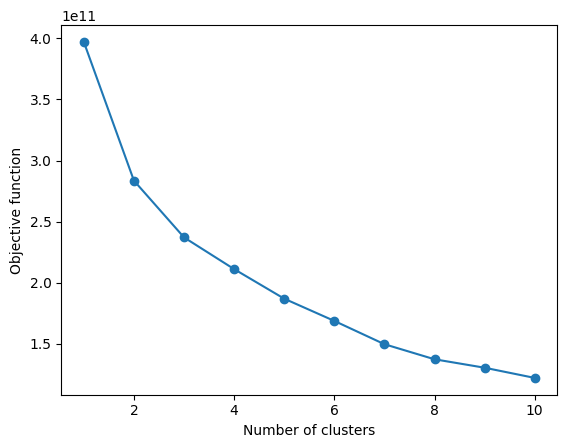

In [16]:
ix = np.zeros(10)
iy = np.zeros(10)

for k in range(ix.shape[0]):
    kmeans = KMeans(n_clusters=k + 1, random_state=rd_seed)
    kmeans.set_params(n_init='auto')
    kmeans.fit(data)
    iy[k] = kmeans.inertia_
    ix[k] = k + 1

plt.xlabel("Number of clusters")
plt.ylabel("Objective function")
plt.plot(ix, iy, 'o-')
plt.show()

Elbow method on own implementation of K-Means:

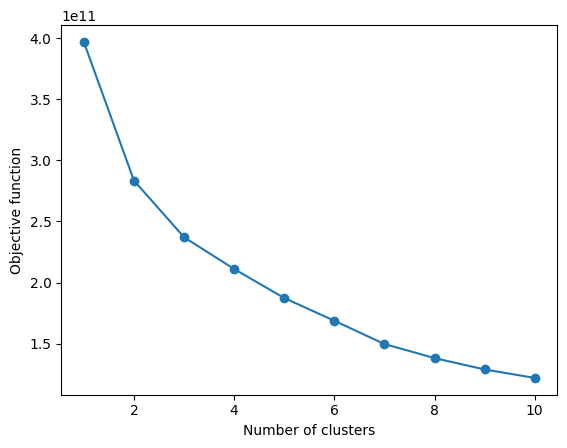

In [17]:
ix = np.zeros(10)
iy = np.zeros(10)

for k in range(ix.shape[0]):
    my_kmeans = my_KMeans(num_clusters=k + 1, rd_seed=rd_seed)
    my_kmeans.fit(data)
    iy[k] = my_kmeans.inertia_
    ix[k] = k + 1

plt.xlabel("Number of clusters")
plt.ylabel("Objective function")
plt.plot(ix, iy, 'o-')
plt.show()

As we can see the biggest breakpoints on points `num_clusters = 2 and 3`. From now on, we will use these values for the number of clusters.

### Hierarchical clustering

Use the `Linkage function` to get a linkage matrix.

In [18]:
from scipy.cluster.hierarchy import linkage

linkage_matrix = linkage(data, method="ward", metric="euclidean")
display(linkage_matrix.shape)

(8949, 4)

Create the function that will show only the `upper part` of the dendrogram `with the distances` where the last large clusters are merged. 

In [19]:
def draw_distance_annotated_dendrogram(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    annotate_if_above = kwargs.pop("annotate_if_above", 0.0)

    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"] = max_d

    plt.title("Dendrogram of hierarchical clustering (cropped) with distance")
    plt.xlabel("Point index (or cluster size)")
    plt.ylabel("Distance")

    ddata = dendrogram(*args, **kwargs)

    for i, d, c in zip(ddata["icoord"], ddata["dcoord"], ddata["color_list"]):
        x = 0.5 * sum(i[1:3])
        y = d[1]

        if y > annotate_if_above:
            plt.plot(x, y, "o", c=c)
            plt.annotate(
                "%.3g" % y, (x, y), xytext=(0, -5), textcoords="offset points", va="top", ha="center"
            )

    if max_d:
        plt.axhline(y=max_d, c="k")

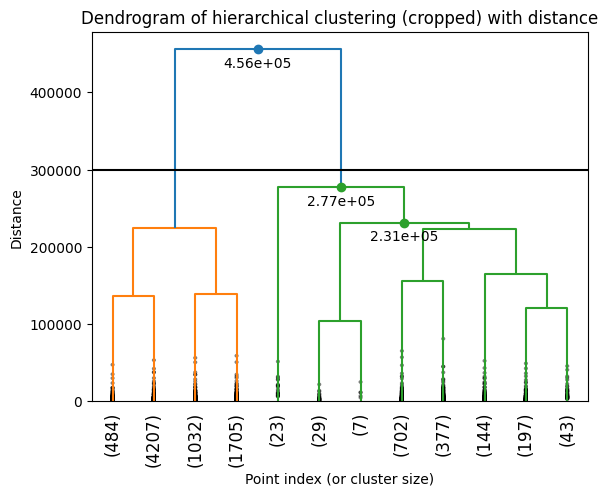

In [20]:
from scipy.cluster.hierarchy import dendrogram
import sys

sys.setrecursionlimit(10000)

draw_distance_annotated_dendrogram(
    linkage_matrix,
    truncate_mode = "lastp",
    p = 12,
    leaf_rotation = 90.,
    leaf_font_size = 12.,
    show_contracted = True,
    annotate_if_above = 225000,
    max_d = 300000
)

plt.show()

This dendogram tells us that it makes sense to divide the dataset into `two clusters` when using `Hierarchical clustering` method with ward linkage algorithm. However, one of the clusters is `significantly larger` than the other.

Let's perform dendrogram evaluation using `cophenetic correlation`.

In [21]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
pdistances = pdist(data, metric="euclidean")
cophenet_coef = np.corrcoef(pdistances, cophenet(linkage_matrix))[0, 1]
print("Cophenetic correlation:", cophenet_coef)

Cophenetic correlation: 0.6184907055108015


Let's try another linkage algorithm: `single`.

(8949, 4)

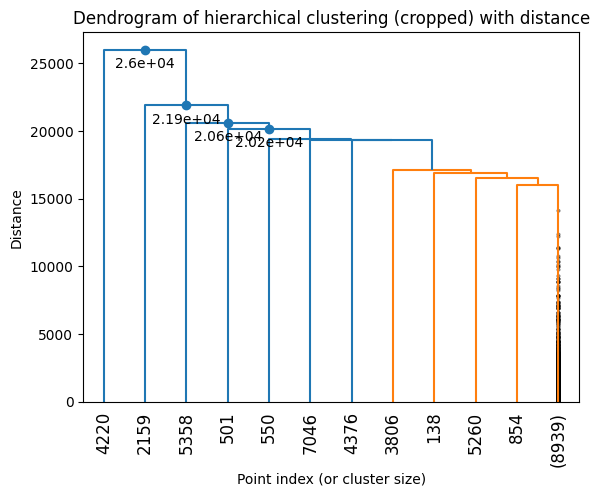

In [22]:
linkage_matrix = linkage(data, method="single", metric="euclidean")
display(linkage_matrix.shape)

draw_distance_annotated_dendrogram(
    linkage_matrix,
    truncate_mode = "lastp",
    p = 12,
    leaf_rotation = 90.,
    leaf_font_size = 12.,
    show_contracted = True,
    annotate_if_above = 20000,
)

plt.show()

As a result, we have a cluster containing `all but one point` and a cluster containing `one point`. There is no sense in even counting the cophenetic coefficient, this linkage algorithm is not good for this dataset.

(8949, 4)

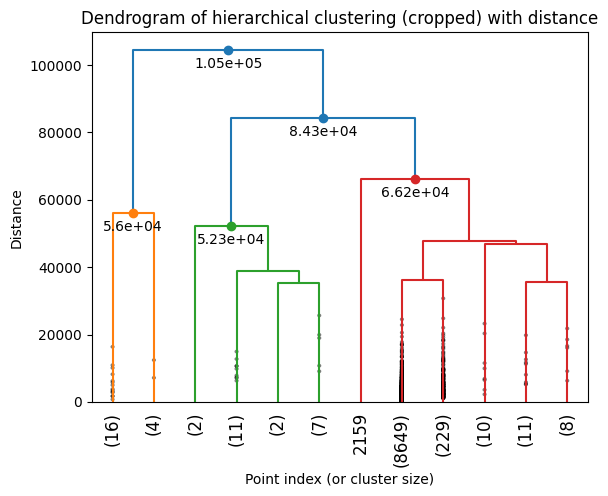

In [23]:
linkage_matrix = linkage(data, method="complete", metric="euclidean")
display(linkage_matrix.shape)

draw_distance_annotated_dendrogram(
    linkage_matrix,
    truncate_mode = "lastp",
    p = 12,
    leaf_rotation = 90.,
    leaf_font_size = 12.,
    show_contracted = True,
    annotate_if_above = 50000,
)

plt.show()

(8949, 4)

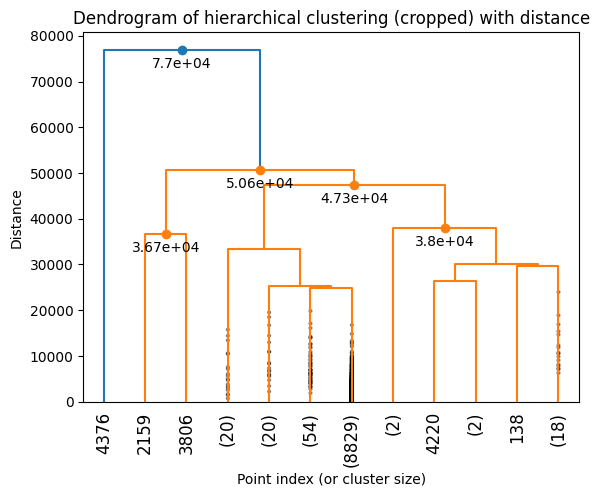

In [24]:
linkage_matrix = linkage(data, method="average", metric="euclidean")
display(linkage_matrix.shape)

draw_distance_annotated_dendrogram(
    linkage_matrix,
    truncate_mode = "lastp",
    p = 12,
    leaf_rotation = 90.,
    leaf_font_size = 12.,
    show_contracted = True,
    annotate_if_above = 35000,
)

plt.show()

Same situation we can see in next linkage algorithms: `complete` and `average`. We are not going to use them.

### Select the best model

Right now we have `three` models left: `Library K-Means`, `Own implementation of K-Means` and `Hierarchical clustering` with `ward linkage algorithm` and two possible choices for the number of clusters: `2 and 3`.

Using the function `silhouette` we will try to find the best one.

In [25]:
from scipy.cluster.hierarchy import fcluster, linkage

linkage_matrix = linkage(data, method="ward", metric="euclidean")
k_clusters_two = fcluster(linkage_matrix, 2, criterion="maxclust")
k_clusters_three = fcluster(linkage_matrix, 3, criterion="maxclust")

In [26]:
kmeans_two = KMeans(n_clusters=2, random_state=rd_seed).set_params(n_init="auto").fit(data)
kmeans_three = KMeans(n_clusters=3, random_state=rd_seed).set_params(n_init="auto").fit(data)

In [27]:
my_kmeans_two = my_KMeans(num_clusters=2, rd_seed=rd_seed)
my_kmeans_two.fit(data)

my_kmeans_three = my_KMeans(num_clusters=3, rd_seed=rd_seed)
my_kmeans_three.fit(data)

In [28]:
from sklearn.metrics import silhouette_score

print("Silhouette evaluation of model Hierarchical clustering with 2 clusters:", silhouette_score(data, k_clusters_two))
print("Silhouette evaluation of model Hierarchical clustering with 3 clusters:", silhouette_score(data, k_clusters_three))
print("Silhouette evaluation of model K-Means with 2 clusters:", silhouette_score(data, kmeans_two.labels_))
print("Silhouette evaluation of model K-Means with 3 clusters:", silhouette_score(data, kmeans_three.labels_))
print("Silhouette evaluation of own implementation of K-Means with 2 clusters:", silhouette_score(data, my_kmeans_two.clusters_))
print("Silhouette evaluation of own implementation of K-Means with 3 clusters:", silhouette_score(data, my_kmeans_three.clusters_))

Silhouette evaluation of model Hierarchical clustering with 2 clusters: 0.5266051255352637
Silhouette evaluation of model Hierarchical clustering with 3 clusters: 0.5200631628630963
Silhouette evaluation of model K-Means with 2 clusters: 0.5035509211478865
Silhouette evaluation of model K-Means with 3 clusters: 0.45375733511550864
Silhouette evaluation of own implementation of K-Means with 2 clusters: 0.5055537092150653
Silhouette evaluation of own implementation of K-Means with 3 clusters: 0.45455401957815045


In all models, the case with two clusters `gave better results`, so now we will consider only this case. Also we may see that both implementations of the K-Means algorithm give the same results, so we will use only library one.

Let's try to use these methods after data `standardization`.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [30]:
linkage_matrix = linkage(data_scaled, method="ward", metric="euclidean")
k_clusters = fcluster(linkage_matrix, 2, criterion="maxclust")
kmeans = KMeans(n_clusters=2, random_state=rd_seed).set_params(n_init="auto").fit(data_scaled)

In [31]:
print("Silhouette evaluation of model Hierarchical clustering with 2 clusters:", silhouette_score(data_scaled, k_clusters))
print("Silhouette evaluation of model K-Means with 2 clusters:", silhouette_score(data_scaled, kmeans.labels_))

Silhouette evaluation of model Hierarchical clustering with 2 clusters: 0.19189958404373578
Silhouette evaluation of model K-Means with 2 clusters: 0.20882198608782365


Let's use some `data optimization` from the beginning of project.

In [32]:
opt_data = data.drop(["ONEOFF_PURCHASES", "PURCHASES_INSTALLMENTS_FREQUENCY"], axis=1)
linkage_matrix = linkage(opt_data, method="ward", metric="euclidean")
k_clusters = fcluster(linkage_matrix, 2, criterion="maxclust")
kmeans = KMeans(n_clusters=2, random_state=rd_seed).set_params(n_init="auto").fit(opt_data)

print("Silhouette evaluation of model Hierarchical clustering with 2 clusters:", silhouette_score(opt_data, k_clusters))
print("Silhouette evaluation of model K-Means with 2 clusters:", silhouette_score(opt_data, kmeans.labels_))

Silhouette evaluation of model Hierarchical clustering with 2 clusters: 0.41599186285614476
Silhouette evaluation of model K-Means with 2 clusters: 0.5033291180988527


In [33]:
# Hierarchical clustering
zeros_hierarchical = [label for label in k_clusters_two if label == 1]
ones_hierarchical = [label for label in k_clusters_two if label == 2]
print("Amount of points in first cluster (Hierarchical clustering):", len(zeros_hierarchical))
print("Amount of points in second cluster (Hierarchical clustering):", len(ones_hierarchical))

# K-Means clustering
zeros_kmeans = [label for label in kmeans_two.labels_ if label == 0]
ones_kmeans = [label for label in kmeans_two.labels_ if label == 1]
print("Amount of points in first cluster (K-Means):", len(zeros_kmeans))
print("Amount of points in second cluster (K-Means):", len(ones_kmeans))

Amount of points in first cluster (Hierarchical clustering): 7428
Amount of points in second cluster (Hierarchical clustering): 1522
Amount of points in first cluster (K-Means): 1907
Amount of points in second cluster (K-Means): 7043


So According to `silhouette evaluation`, the best clustering model for this dataset is `Hierarchical clustering` with ward `linkage algorithm` and `2 clusters` to find. 

These two clusters are unequally separated, but in the other separations they are also unequally sized ( apparently, this is how it should be ).

### Interpretation of the clusters

Divide the dataset into `two clusters`.

In [34]:
k_clusters_two

array([1, 2, 1, ..., 1, 1, 1], dtype=int32)

In [35]:
first_cluster = pd.DataFrame([data.loc[0]])
second_cluster = pd.DataFrame([data.loc[1]], index=[0])

for i, cluster_index in enumerate(k_clusters_two):
    if i >= 2:
        if cluster_index == 1:
            first_cluster.loc[len(first_cluster.index)] = data.loc[i]
        else:
            second_cluster.loc[len(second_cluster.index)] = data.loc[i]

Now let's delve a little deeper into the `statistics of each cluster`.

In [36]:
print("First Cluster Summary:")
display(first_cluster.describe())

print("\nSecond Cluster Summary:")
display(second_cluster.describe())

First Cluster Summary:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.0000,7428.000000,7428.000000,7428.000000,7428.000000
mean,1128.257641,0.867883,673.228491,356.487237,317.090968,664.523059,0.472402,0.170114,0.354280,0.122448,2.708535,11.640145,3273.3398,1122.015007,770.641100,0.148568,11.467151
std,1330.903592,0.244442,946.895142,680.969320,548.680779,1191.327403,0.397717,0.269757,0.393988,0.183538,5.449080,17.063963,2110.2298,1202.832047,1346.563264,0.286556,1.402213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0000,0.000000,0.019163,0.000000,6.000000
25%,97.865264,0.833333,27.370000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.0000,333.770863,165.043508,0.000000,12.000000
50%,713.435344,1.000000,311.835000,0.000000,75.000000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2700.0000,694.477439,289.056124,0.000000,12.000000
75%,1610.334199,1.000000,904.672500,419.900000,416.632500,909.607327,0.916667,0.250000,0.750000,0.166667,3.000000,14.000000,4500.0000,1452.293167,725.034407,0.125000,12.000000
max,7803.071972,1.000000,6697.570000,5497.040000,6229.410000,9579.677222,1.000000,1.000000,1.000000,1.500000,123.000000,232.000000,12500.0000,9221.922948,14437.122090,1.000000,12.000000



Second Cluster Summary:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000
mean,3693.398129,0.923087,2613.628141,1743.973239,869.713344,2513.021798,0.577949,0.360307,0.414011,0.197109,5.885677,29.691196,10453.978019,4715.709597,2067.406370,0.178834,11.762155
std,3373.223139,0.189506,4399.426052,3513.918201,1757.312507,4013.579025,0.407686,0.371886,0.410456,0.257899,10.984722,44.080442,3651.128976,5614.519604,4931.975250,0.318836,0.930137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,3.197940,0.000000,6.000000
25%,589.017053,1.000000,148.072500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,2.000000,8500.000000,1331.919754,234.537838,0.000000,12.000000
50%,3070.594993,1.000000,1021.980000,478.410000,213.895000,330.418043,0.666667,0.200000,0.333333,0.083333,1.000000,12.500000,10000.000000,2651.773704,953.849146,0.000000,12.000000
75%,5888.160409,1.000000,3447.402500,2064.062500,1033.195000,3758.210723,1.000000,0.666667,0.833333,0.333333,8.000000,39.000000,12000.000000,6233.365732,1938.964372,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.250000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


First of all, we can observe that the second cluster has `larger mean values` of each of the features. In theory, this could be because the size of the first group is larger ( the sample is more stable ). However, the `first quantile`, `median`, `third quantile` and `maximum` values of the second cluster in almost all columns are also greater than the relevant values of the first cluster. It means that mean values are not affected by the size of the group, but by the `content of the group`. So we can assume that in the second cluster we have more `active users`. Now let's take a closer look at some of the columns individually:
 Average values of amount of purchases made from account and amount of payment done by user are `4 times more` in the second cluster than in the first;
* Same situation with cash in advance;
* Average of maximum purchase amount done in one-go in the second group is `6 times` as much as in the first;
* The credit limit is also several times higher in the second cluster; 
The last two points may suggest that the second group of users includes `private entrepreneurs`, for whom the credit limit is usually higher and the amount of payments are more.

### Conclusion

To summarize all of the above, I am ready to say with confidence that we have divided credit card users into `two groups`: the first group is `average`, the second one is `more active`. There are more payments on the accounts of the second group, their amounts are also larger and credit limits are higher. I can also assume that the second group of users includes a `larger number of entrepreneurs`, who tend to have more activity on their cards.

**That's all!**